# Forests and Trees

Ensemble methods combine predictions across multiple models to improve prediction.

 - *weak learners* - simple models that predict slightly better than random guessing
 - *strong learners* - more complex models that predict significantly better than chance


## Random Forests (RandomForestClassifier)

 A random forest creates numerous trees in parallel (at the same time). Each tree is relatively shallow, sometimes only a single node (called a stump).
 
 To make a prediction, a sample is processed by each tree, each tree makes a prediction, and the majority vote wins. But what makes the trees in the forest different from each other?

 In fitting, diversity of trees is created using two methods: feature selection and bagging.

### Random feature subsets

  Each tree only gets a subset of the features. For example, in a random forest deciding whether or not you should buy a car, one tree might make a prediction based on ['reliability', 'feul economy', 'price'], while another uses ['top speed', 'interior room', 'cost to repair'], and another uses ['resale value', 'feul economy', 'value of standard tech'] and another...

### Bagging (<ins>B</ins>ootstrap <ins>agg</ins>regat<ins>ing</ins>)

  *Bootstrapping* is a method for creating new data sets by sampling existing data sets. In bootstrapping, you select samples randomly and allow a sample to be selected multiple times (called sampling with replacement).

  *Bagging* is a method that uses bootstrapping to create different training sets for each tree, and then aggregating the results.

### Why it works?

  The idea is that no one tree will be great, but they'll all make different mistakes. But there'll be more overlap in correct guesses than in mistakes. So for any given sample, the majority vote is more likely to be correct than any one tree.

## Gradient Boosted Trees

Whereas Random Forests fit trees in parallel and every tree gets an equal vote, Boosted trees create trees sequentially, each new tree focusing on the shortcomings of the previous. And at the voting stage, some trees get more say than others.

There are many flavors of Boosted trees: AdaBoost, XGBoost, CatBoost

They all work a little differently, but here's an outline of AdaBoost as an example:

### AdaBoost (<ins>Ada</ins>ptive <ins>Boost</ins>ing) ( ```GradientBoostingClassifier```)

In AdaBoost, a tree comprises only one decision node; this kind of tree is called a stump. In each iteration, a new stump is created that splits the data based on a different condition. As the algorithm iterates, it keeps track of:

- Sample Weight - each iteration, the algorithm focuses more on misclassified samples. 
   - A sample that is classified correctly is down-weighted. We get this right, don't spend more energy on this case.
   - A sample that is classified incorrectly is up-weighted. We get this wrong, focus on this case.

 - Tree Influence - how much say a tree will have in the final vote. Trees that do better at classifying get more say.
    - A tree that is 50% correct gets no say. This tree is just guessing
    - A tree that is >50% gets a positive vote (0 to infinity). A tree that is 100% correct gets infinite vote! Listen to that tree!
    - A tree that is <50% gets a negative vote (0 to -infinity). A tree that is 0% correct gets a -infinite vote! Do the opposite of that tree!


The AdaBoost process:
 1. Start with all the samples each counts the same. 
 2. Same as in a decision tree, pick a question that splits the data to minimize Gini Impurity.
 3. Sum up sample weights for mis-classified samples and calculate Tree Influence.
 4. Assign new weights to samples, increasing weights on mistakes and decreasing weights on correct classifications.
 5. Create new stump, and repeat 2-5 until classification error is below some threshold you choose.

When you predict, you feed the sample through all the stumps and each votes according to their influence.

### Example: Spam email prediction

In [1]:
# !pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
Y = spambase.data.targets 

# to make y a compatible shape for sklearn models
y = Y['Class']
labels = ['ham', 'spam']

# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [3]:
X.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      4601.000000     4601.000000  ...           4601.000000   
mean          0.090067        0.239413  ...              0.031869   
std           0.278616        0.644755  ...              0.285735   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.000000        0.160000  ...              0.000000   
max           5.260000       18.180000  ...             10.000000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.038575     0.139030     0.016976     0.269071     0.075811   
std       0.243471     0.270355     0.109394     0.815672     0.245882   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.065000     0.000000     0.000000     0.000000   
75%       0.000000     0.188000     0.000000     0.315000     0.052000   
max       4.385000     9.752000     4.081000    32.478000     6.003000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  4601.000000                 4601.000000                 4601.000000   
mean      0.044238                    5.191515                   52.172789   
std       0.429342                   31.729449                  194.891310   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    1.588000                    6.000000   
50%       0.000000                    2.276000                   15.000000   
75%       0.000000                    3.706000                   43.000000   
max      19.829000                 1102.500000                 9989.000000   

       capital_run_length_total  
count               4601.000000  
mean                 283.289285  
std                  606.347851  
min                    1.000000  
25%                   35.000000  
50%                   95.000000  
75%                  266.000000  
max                15841.000000  

[8 rows x 57 columns]

### Example: Palmer Penguins

In [4]:
# palmer = pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv', index_col = 'rowid')

# palmer.dropna(axis = 0, inplace=True)
# palmer.reset_index(drop = True, inplace=True)

# features = ['bill_length_mm', 'bill_depth_mm',
#        'flipper_length_mm', 'body_mass_g']

# target = 'species'
# labels = ['Adelie', 'Chinstrap', 'Gentoo']

# X = palmer[features]
# y = palmer[target]

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Decision Tree
dt_params = {'max_depth': [3, 6, 9, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Random Forest
rf_params = {'n_estimators': [10, 30, 100], 'max_depth': [1, 2]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Gradient Boosted Trees
gb_params = {'n_estimators': [10, 30, 100], 'max_depth': [1, 2]}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)


# Get the best models
print("Best Decision Tree params:", dt_grid.best_params_)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best Gradient Boosted params:", gb_grid.best_params_)

tree = dt_grid.best_estimator_
forest = rf_grid.best_estimator_
boosted = gb_grid.best_estimator_

Best Decision Tree params: {'max_depth': 6, 'min_samples_split': 10}
Best Random Forest params: {'max_depth': 2, 'n_estimators': 100}
Best Gradient Boosted params: {'max_depth': 2, 'n_estimators': 100}


In [6]:
y_tree_train = tree.predict(X_train)
y_tree_test = tree.predict(X_test)

y_forest_train = forest.predict(X_train)
y_forest_test = forest.predict(X_test)

y_boosted_train = boosted.predict(X_train)
y_boosted_test = boosted.predict(X_test)


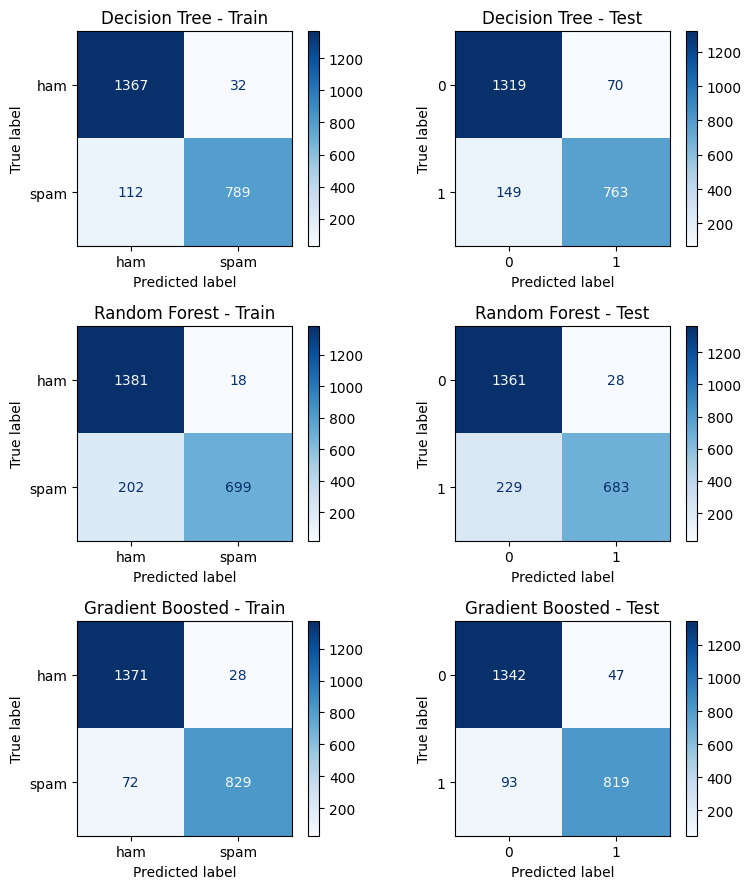

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt

models = [
    ('Decision Tree', y_tree_train, y_tree_test),
    ('Random Forest', y_forest_train, y_forest_test),
    ('Gradient Boosted', y_boosted_train, y_boosted_test)
]

fig, axes = plt.subplots(3, 2, figsize=(8, 9))

for i, (name, y_pred_train, y_pred_test) in enumerate(models):
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)
    disp_test = ConfusionMatrixDisplay(cm_test)

    disp_train.plot(ax=axes[i, 0], cmap='Blues', values_format='d')
    axes[i, 0].set_title(f'{name} - Train')

    disp_test.plot(ax=axes[i, 1], cmap='Blues', values_format='d')
    axes[i, 1].set_title(f'{name} - Test')

plt.tight_layout()



In [8]:
import numpy as np

def display_feature_importance(model):
    imps = model.feature_importances_
    features = model.feature_names_in_
    
    sort_idx = np.argsort(imps)[::-1]
    imps = imps[sort_idx]
    features = features[sort_idx]
    
    for k, (feature, imp) in enumerate(zip(features, imps), start = 1):
        print(f'{k:>3}. {feature:_<30}{imp:.4f}')
        


In [9]:

print('\nDECISION TREE\n====================================')
display_feature_importance(tree)




DECISION TREE
  1. char_freq_$___________________0.4501
  2. word_freq_remove______________0.2068
  3. char_freq_!___________________0.0992
  4. word_freq_hp__________________0.0598
  5. capital_run_length_total______0.0470
  6. word_freq_free________________0.0320
  7. word_freq_edu_________________0.0168
  8. word_freq_george______________0.0163
  9. word_freq_000_________________0.0162
 10. capital_run_length_longest____0.0110
 11. word_freq_you_________________0.0108
 12. capital_run_length_average____0.0089
 13. word_freq_1999________________0.0081
 14. word_freq_hpl_________________0.0066
 15. word_freq_email_______________0.0038
 16. word_freq_over________________0.0023
 17. word_freq_conference__________0.0022
 18. word_freq_mail________________0.0022
 19. word_freq_font________________0.0000
 20. word_freq_business____________0.0000
 21. word_freq_your________________0.0000
 22. word_freq_credit______________0.0000
 23. word_freq_address_____________0.0000
 24. word_freq_repo

In [10]:

print('\nRANDOM FOREST\n====================================')
display_feature_importance(forest)



RANDOM FOREST
  1. char_freq_$___________________0.1412
  2. char_freq_!___________________0.1224
  3. word_freq_remove______________0.1150
  4. word_freq_free________________0.0709
  5. capital_run_length_longest____0.0601
  6. word_freq_your________________0.0578
  7. capital_run_length_average____0.0521
  8. word_freq_money_______________0.0515
  9. capital_run_length_total______0.0507
 10. word_freq_george______________0.0482
 11. word_freq_000_________________0.0414
 12. word_freq_hp__________________0.0302
 13. word_freq_internet____________0.0232
 14. word_freq_hpl_________________0.0213
 15. word_freq_our_________________0.0199
 16. word_freq_you_________________0.0195
 17. word_freq_all_________________0.0141
 18. word_freq_1999________________0.0098
 19. word_freq_business____________0.0094
 20. word_freq_receive_____________0.0072
 21. word_freq_over________________0.0065
 22. word_freq_make________________0.0051
 23. word_freq_address_____________0.0045
 24. word_freq_edu_

In [11]:

print('\nBOOSTED TREE\n====================================')
display_feature_importance(boosted)


BOOSTED TREE
  1. char_freq_$___________________0.2472
  2. char_freq_!___________________0.2080
  3. word_freq_remove______________0.1500
  4. word_freq_free________________0.0722
  5. word_freq_hp__________________0.0679
  6. capital_run_length_average____0.0658
  7. capital_run_length_longest____0.0375
  8. word_freq_george______________0.0357
  9. word_freq_your________________0.0247
 10. word_freq_money_______________0.0200
 11. word_freq_our_________________0.0175
 12. capital_run_length_total______0.0100
 13. word_freq_edu_________________0.0094
 14. word_freq_650_________________0.0068
 15. word_freq_re__________________0.0041
 16. word_freq_meeting_____________0.0032
 17. word_freq_000_________________0.0032
 18. word_freq_1999________________0.0031
 19. word_freq_receive_____________0.0026
 20. word_freq_internet____________0.0020
 21. word_freq_you_________________0.0018
 22. word_freq_business____________0.0017
 23. word_freq_over________________0.0015
 24. char_freq_;____

### In class exercise

The following dataset can be found at [UCI ML repository](https://archive.ics.uci.edu/dataset/2/adult)

Based on census information, can we predict whether an individual makes over $50K/yr?

In [12]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

X

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  
0      United-States  
1      United-States  
2      United-States  
3      United-States  
4               Cuba  
...              ...  
48837  United-States  
48838  United-States  
48839  United-States  
48840  United-States  
48841  United-States  

[48842 rows x 14 columns]

In [13]:
y.replace({'<=50K.':'<=50K', '>50K.':'>50K'}, inplace = True)

/var/folders/qm/g7x838zs775f4j_5s231csf80000gn/T/ipykernel_11669/2185987382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'<=50K.':'<=50K', '>50K.':'>50K'}, inplace = True)


In [14]:
X = X.drop(columns = 'education')
X.replace({np.nan:'?'}, inplace = True)

In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ord_features = ['sex']
oe = OrdinalEncoder(categories = [['Male', 'Female']])

cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
oh = OneHotEncoder()

ss = StandardScaler()

num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
ct = ColumnTransformer([
    ('ord', oe, ord_features),
    ('oh', oh, cat_features),
    ('ss', ss, num_features)
],
    sparse_threshold = 0,
    verbose_feature_names_out=False)

Xt = ct.fit_transform(X)


In [16]:
Xt.shape

(48842, 91)